# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
name = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
#     print(url)
    try:
         
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
#         new_cities.append(city)
        
        
 # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)  
    
    except(KeyError):
        print(f'City not found!')
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
    
    

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | albany
Processing record 2 of set 0 | kjollefjord
Processing record 3 of set 0 | karratha
Processing record 4 of set 0 | carnarvon
Processing record 5 of set 0 | ponta do sol
Processing record 6 of set 0 | hualmay
Processing record 7 of set 0 | barrow
Processing record 8 of set 0 | chuy
Processing record 9 of set 0 | atuona
Processing record 10 of set 0 | rikitea
Processing record 11 of set 0 | vaini
Processing record 12 of set 0 | westport
Processing record 13 of set 0 | hithadhoo
Processing record 14 of set 0 | singapore
Processing record 15 of set 0 | saint-augustin
Processing record 16 of set 0 | arman
Processing record 17 of set 0 | kibala
Processing record 18 of set 0 | nome
Processing record 19 of set 0 | mareeba
Processing record 20 of set 0 | mataura
Processing record 21 of set 0 | henties bay
Processing record 22 of set 0 | mezhdurechensk
Processing record 23 of set 0 | katobu
Processing record 2

Processing record 41 of set 3 | phuthaditjhaba
Processing record 42 of set 3 | nahan
Processing record 43 of set 3 | freeport
Processing record 44 of set 3 | alberton
Processing record 45 of set 3 | victoria
Processing record 46 of set 3 | pacific grove
Processing record 47 of set 3 | hvide sande
Processing record 48 of set 3 | fairbanks
Processing record 49 of set 3 | tohana
Processing record 50 of set 3 | bjaeverskov
Processing record 0 of set 4 | matay
Processing record 1 of set 4 | san francisco
Processing record 2 of set 4 | flinders
Processing record 3 of set 4 | port hedland
Processing record 4 of set 4 | sault sainte marie
Processing record 5 of set 4 | sentyabrskiy
City not found!
Processing record 6 of set 4 | le pradet
Processing record 7 of set 4 | norman wells
Processing record 8 of set 4 | cherskiy
Processing record 9 of set 4 | artyom
Processing record 10 of set 4 | luxor
Processing record 11 of set 4 | port arthur
Processing record 12 of set 4 | port hardy
Processing re

Processing record 29 of set 7 | pandan
Processing record 30 of set 7 | saurimo
Processing record 31 of set 7 | laguna
Processing record 32 of set 7 | toliary
City not found!
Processing record 33 of set 7 | inawashiro
Processing record 34 of set 7 | petropavlovsk-kamchatskiy
Processing record 35 of set 7 | burica
City not found!
Processing record 36 of set 7 | muravlenko
Processing record 37 of set 7 | klaksvik
Processing record 38 of set 7 | ayan
Processing record 39 of set 7 | chapais
Processing record 40 of set 7 | marapanim
Processing record 41 of set 7 | gat
Processing record 42 of set 7 | oistins
Processing record 43 of set 7 | bengkulu
Processing record 44 of set 7 | kokopo
Processing record 45 of set 7 | menongue
Processing record 46 of set 7 | constantine
Processing record 47 of set 7 | rantepao
Processing record 48 of set 7 | lata
Processing record 49 of set 7 | kadykchan
City not found!
Processing record 50 of set 7 | suzhou
Processing record 0 of set 8 | solotvyn
Processing 

Processing record 17 of set 11 | san matias
Processing record 18 of set 11 | north bend
Processing record 19 of set 11 | shafranovo
Processing record 20 of set 11 | aden
Processing record 21 of set 11 | les cayes
Processing record 22 of set 11 | zhanakorgan
Processing record 23 of set 11 | jalu
Processing record 24 of set 11 | qalyub
Processing record 25 of set 11 | rolim de moura
City not found!
Processing record 26 of set 11 | farafangana
Processing record 27 of set 11 | balgazyn
Processing record 28 of set 11 | cheyenne
Processing record 29 of set 11 | gamboma
Processing record 30 of set 11 | sale
Processing record 31 of set 11 | ludvika
Processing record 32 of set 11 | haines junction
Processing record 33 of set 11 | luleburgaz
Processing record 34 of set 11 | coahuayana
Processing record 35 of set 11 | moyale
Processing record 36 of set 11 | oxford
Processing record 37 of set 11 | sechura
Processing record 38 of set 11 | emba
Processing record 39 of set 11 | kudahuvadhoo
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
weatherpy_dict = {
    "City": name,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind,
    "Country":country,
    "Date":date    
}

# weather_data_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temp": temp, "Humidity": humidity,
#                        "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date})
# Create a data frame from dictionary
weather_data_df = pd.DataFrame(weatherpy_dict)
weather_data_df.head()
# Display count of weather data values 
# weather_data.count()

#weather_data_df.to_csv(index=False)
# weather_data_df.to_csv(r'C:\Users\shaes\OneDrive\Desktop\Homework\Python API Homework 6\Python-API-Challenge\WeatherPy/cities.csv', index = False)
weather_data_df.to_csv("../WeatherPy/cities.csv")

In [28]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,30.0,88,100,1.01,US,1612292778
1,Kjøllefjord,70.9457,27.3465,24.8,86,90,14.97,NO,1612292779
2,Karratha,-20.7377,116.8463,81.0,82,87,15.99,AU,1612292780
3,Carnarvon,-24.8667,113.6333,75.2,100,40,21.85,AU,1612292782
4,Ponta do Sol,32.6667,-17.1000,61.0,87,78,3.00,PT,1612292783


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
humidity_test = weather_data_df["Humidity"].describe(include = "all")
# print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
humidity_test


count    579.000000
mean      73.352332
std       20.393114
min       12.000000
25%       64.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

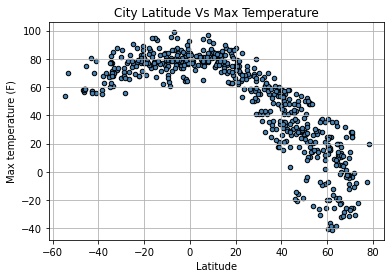

In [64]:
weather_data_df.plot(kind='scatter', x='Lat', y='Max Temp', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsTemperature.png")

## Latitude vs. Humidity Plot

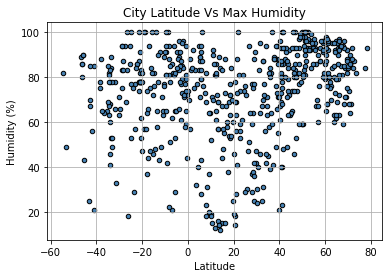

In [61]:
weather_data_df.plot(kind='scatter',x='Lat',y='Humidity', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsHumidity.png")

## Latitude vs. Cloudiness Plot

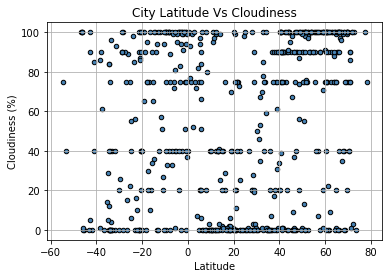

In [62]:
weather_data_df.plot(kind='scatter',x='Lat',y='Cloudiness', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsCloudiness.png")

## Latitude vs. Wind Speed Plot

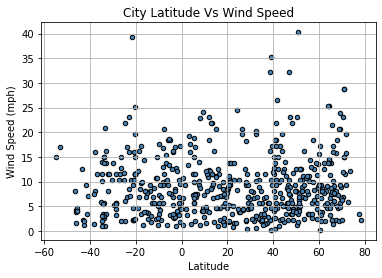

In [63]:
weather_data_df.plot(kind='scatter',x='Lat',y='Wind Speed', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


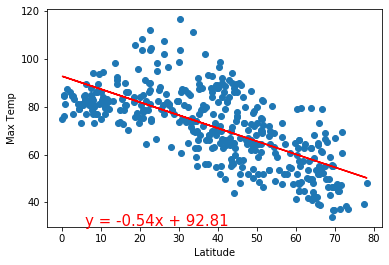

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


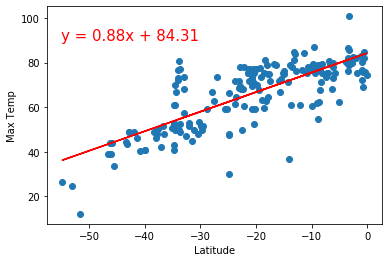

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


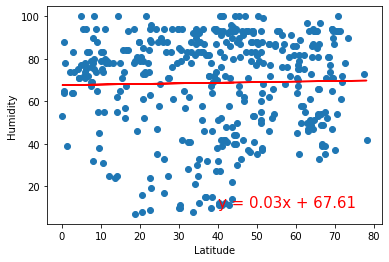

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


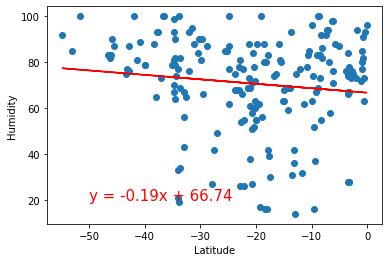

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


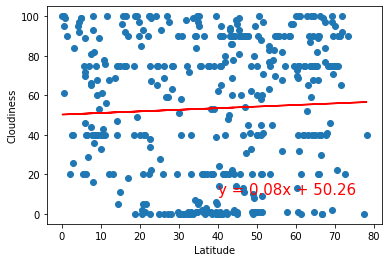

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


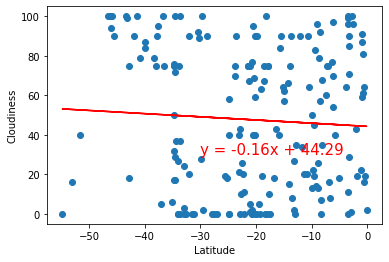

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


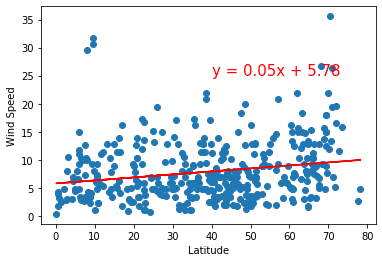

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


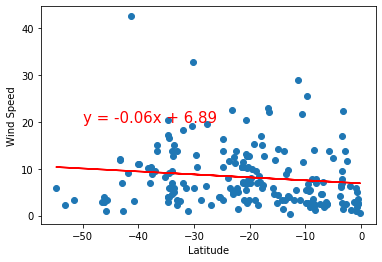